In [63]:
import pandas as pd;

h=pd.read_csv("housing.csv");
h.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


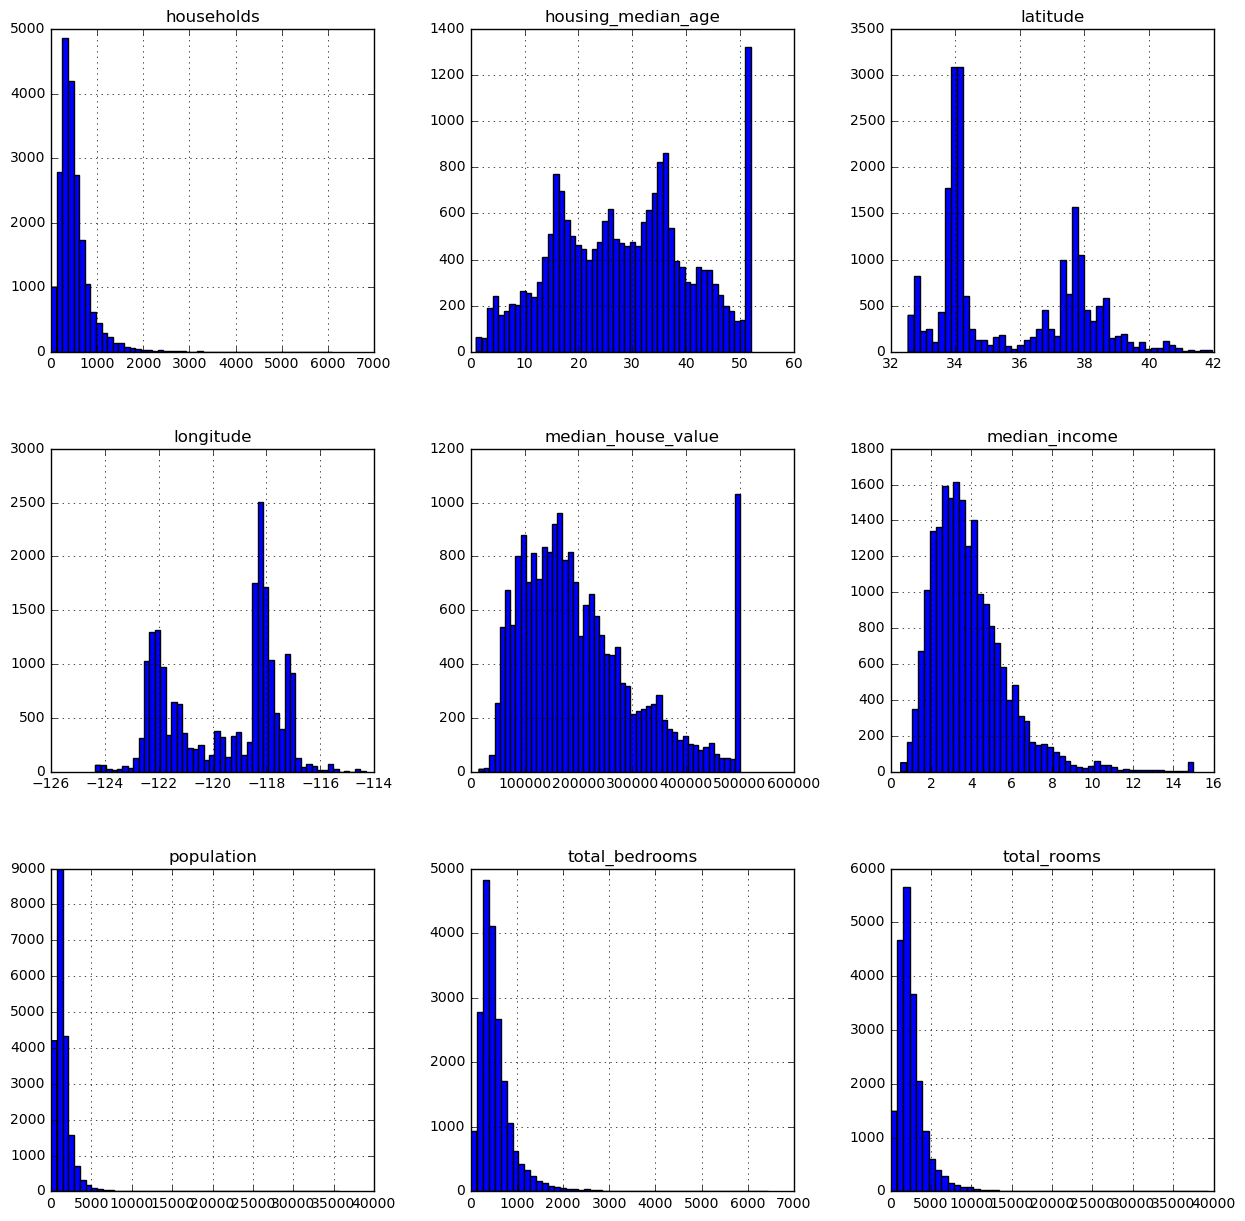

In [64]:
import matplotlib.pyplot as plt
h.hist(bins=50, figsize=(15,15))
plt.show()

In [65]:
from sklearn import preprocessing as pre;

h["ocean_proximity"]=pre.LabelEncoder().fit_transform(h["ocean_proximity"])
h.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3


In [66]:
h.isnull().sum()
X=pre.Imputer().fit_transform(h)
h=pd.DataFrame(X,columns=h.columns)
h.head()
h.isnull().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [67]:
print(h["housing_median_age"].max())
print(h["housing_median_age"].where(h["housing_median_age"]==52).count())
print(h["housing_median_age"].count())
h=h[h["housing_median_age"]<52]
print(h["housing_median_age"].count())


52.0
1273
20640
19367


In [68]:
print(h["median_house_value"].max())
print(h["median_house_value"].where(h["median_house_value"]>=500001).count())
print(h["median_house_value"].count())
h=h[h["median_house_value"]<500001]
print(h["median_house_value"].count())


500001.0
795
19367
18572


In [69]:
print(h["median_income"].max())
print(h["median_income"].where(h["median_income"]>=15).count())
print(h["median_income"].count())
h=h[h["median_income"]<500001]
print(h["median_income"].count())

15.0001
2
18572
18572


In [70]:

newh=h.reset_index()
Y=newh["median_house_value"]
newh=newh.drop("median_house_value",axis=1)
X=pre.StandardScaler().fit_transform(newh)
X=pd.DataFrame(X,columns=newh.columns)
print(X.head(5))
print(Y.head(5))


      index  longitude  latitude  housing_median_age  total_rooms  \
0 -1.745923  -1.385831  1.064775            1.226098    -0.804418   
1 -1.745754  -1.380783  1.055463           -0.523452     1.992184   
2 -1.744574  -1.400977  1.046150            1.313576    -0.051193   
3 -1.743394  -1.400977  1.050807            2.013396    -0.696493   
4 -1.742889  -1.400977  1.046150            2.013396    -0.193294   

   total_bedrooms  population  households  median_income  ocean_proximity  
0       -0.980605   -0.987514   -0.982453       2.950274         1.379236  
1        1.306466    0.800238    1.615371       2.935115         1.379236  
2        0.274124   -0.227354    0.221479      -1.027299         1.379236  
3       -0.620105   -0.665048   -0.628205      -0.998891         1.379236  
4       -0.217468   -0.413094   -0.230317      -1.084178         1.379236  
0    452600.0
1    358500.0
2    226700.0
3    140000.0
4    158700.0
Name: median_house_value, dtype: float64


Creating a testset

In [71]:
import numpy as np;
print(len(X))
def createTestSet(set,resultset,test_set_ratio):
    np.random.seed(42)
    shuffled_indeces=np.random.permutation(len(set))
    test_set_length=int(np.round(len(set)*test_set_ratio))
    Xtrain=set[test_set_length:]
    Xtest=set[:test_set_length]
    Ytrain=resultset[test_set_length:]
    Ytest=resultset[:test_set_length]
    return Xtrain,Xtest,Ytrain,Ytest

Xtrain,Xtest,Ytrain,Ytest=createTestSet(X,Y,0.2)

    

18572


In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
forest_reg=RandomForestRegressor()
#forest_reg.fit(Xtrain,Ytrain)
#predictions=forest_reg.predict(Xtrain)
#mse=mean_squared_error(Ytrain,predictions)
#print(np.sqrt(mse))
#predictions=forest_reg.predict(Xtest)
#mse=mean_squared_error(Ytest,predictions)
#print(np.sqrt(mse))
scores=cross_val_score(forest_reg,Xtrain,Ytrain, scoring="neg_mean_squared_error", cv=10)
cvscores=np.sqrt(-scores)
print(cvscores.mean())
predictions=forest_reg.predict(Xtest)
mse=mean_squared_error(Ytest,predictions)
print(np.sqrt(mse))

66872.6774969


NotFittedError: Estimator not fitted, call `fit` before exploiting the model.